![title](amex.jpg)

# AmExpert 2018 (Machine Learning Hackathon)
**-Analytics Vidhya**

## Problem Statement

Recent years have witnessed a surge in the number of internet savvy users. Companies in the financial services domain leverage this huge internet traffic arriving at their interface by strategically placing ads/promotions for cross selling of various financial products on a plethora of web pages. The digital analytics unit of Best Cards Company uses cutting edge data science and machine learning for successful promotion of its valuable card products. They believe that a predictive model that forecasts whether a session involves a click on the ad/promotion would help them extract the maximum out of the huge clickstream data that they have collected. You are hired as a consultant to build an efficient model to predict whether a user will click on an ad or not, given the following features:

* **Clickstream data/train data for duration: (2nd July 2017 – 7th July 2017)**
* **Test data for duration: (8th July 2017 – 9th July 2017)**
* **User features (demographics, user behaviour/activity, buying power etc.)**
* **Historical transactional data of the previous month with timestamp info (28th May 2017– 1st July 2017). This data contains * actions (views/interest registered) taken by the user historically on the product page via an ad or other sources**
* **Ad features (product category, webpage, campaign for ad etc.)**
* **Date time features (exact timestamp of the user session)**

### Imports

In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [249]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


Lets look at the historical data given and see what can we do with it

### Historical Log Data

In [3]:
log=pd.read_csv('historical_user_logs.csv')
log.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view


### Grouping the historical log data using and extracting features

* user and product view count
* user and product interest count

In [129]:
user_view=log[log.action=='view'].groupby(by=['user_id','product','action']).count().rename(columns={'DateTime':'count_view','action':'action_view'}).reset_index()
user_view.head()

,user_id,product,action,count_view
0,4,A,view,3
1,4,B,view,1
2,4,H,view,1
3,4,I,view,2
4,19,A,view,14


In [130]:
user_interest=log[log.action=='interest'].groupby(by=['user_id','product','action']).count().rename(columns={'DateTime':'count_interest','action':'action_interest'}).reset_index()
user_interest.head()

,user_id,product,action,count_interest
0,19,D,interest,1
1,19,F,interest,2
2,19,G,interest,2
3,26,H,interest,1
4,30,H,interest,1


### Combining the dataset on train data therefore getting the count of each datasets

**Train Data**

In [131]:
train_log=pd.merge(train,user_view,on=['user_id','product'],how='left')
train_log=train_log.merge(user_interest,on=['user_id','product'],how='left')
train_log.drop(['action_x','action_y'],axis=1,inplace=True)
train_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463291 entries, 0 to 463290
Data columns (total 17 columns):
session_id                463291 non-null int64
DateTime                  463291 non-null object
user_id                   463291 non-null int64
product                   463291 non-null object
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
product_category_2        97437 non-null float64
user_group_id             445048 non-null float64
gender                    445048 non-null object
age_level                 445048 non-null float64
user_depth                445048 non-null float64
city_development_index    338162 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
count_view                376828 non-null float64
count_interest            81212 non-null float64
dtypes: float64(7), int64(7), object(3)
memory usage: 63.6

**Test Data**

In [133]:
test_log=pd.merge(test,user_view,on=['user_id','product'],how='left')
test_log=test_log.merge(user_interest,on=['user_id','product'],how='left')
test_log.drop(['action_x','action_y'],axis=1,inplace=True)
test_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128858 entries, 0 to 128857
Data columns (total 16 columns):
session_id                128858 non-null int64
DateTime                  128858 non-null object
user_id                   128858 non-null int64
product                   128858 non-null object
campaign_id               128858 non-null int64
webpage_id                128858 non-null int64
product_category_1        128858 non-null int64
product_category_2        52687 non-null float64
user_group_id             123174 non-null float64
gender                    123174 non-null object
age_level                 123174 non-null float64
user_depth                123174 non-null float64
city_development_index    94249 non-null float64
var_1                     128858 non-null int64
count_view                101482 non-null float64
count_interest            21889 non-null float64
dtypes: float64(7), int64(6), object(3)
memory usage: 16.7+ MB


## EDA

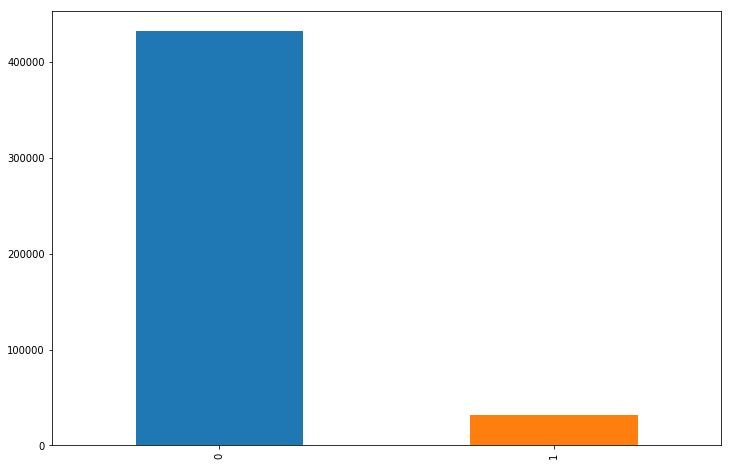

In [266]:
train.is_click.value_counts().plot.bar()

Too much imbalanced data, maybe sampling techniques can be used but the bar is too high for it i think

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


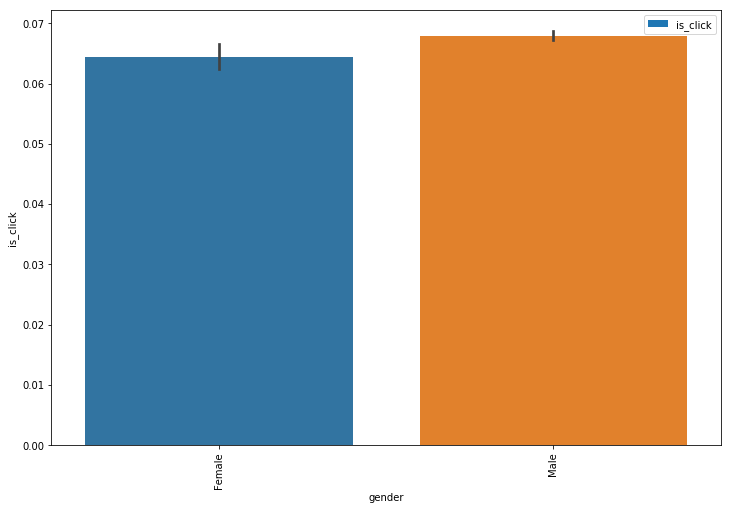

In [267]:
train[['gender','is_click']].groupby('gender').mean().plot.bar()
sns.barplot('gender', 'is_click', data = train)
plt.show()

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


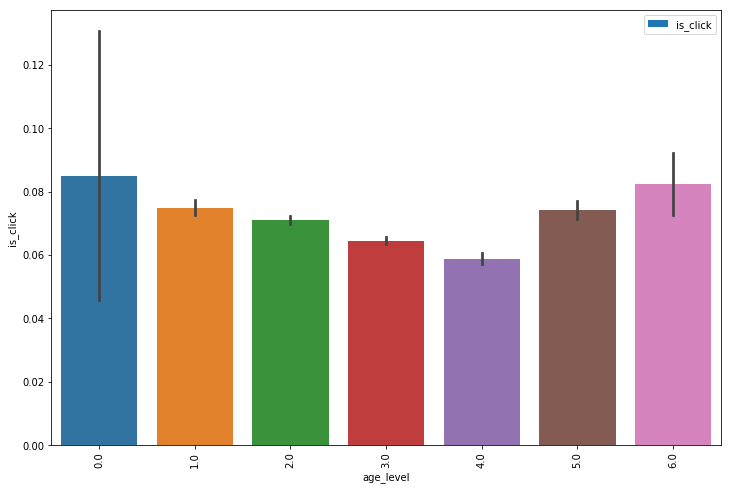

In [268]:
train[['age_level','is_click']].groupby('age_level').mean().plot.bar()
sns.barplot('age_level', 'is_click', data = train)
plt.show()

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


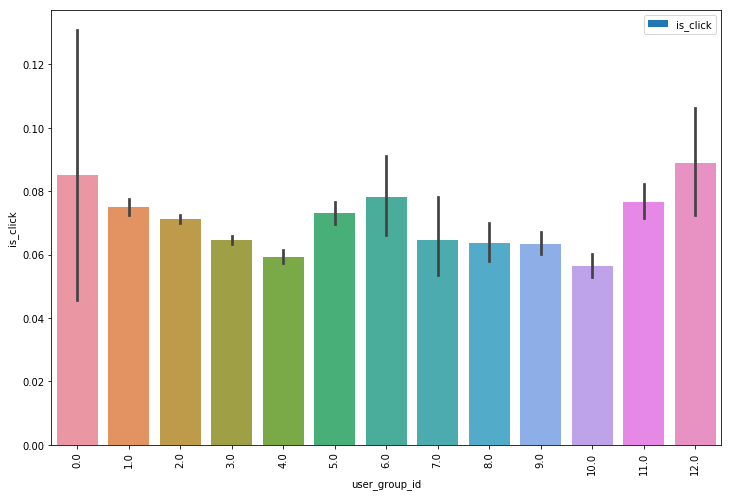

In [269]:
train[['user_group_id','is_click']].groupby('user_group_id').mean().plot.bar()
sns.barplot('user_group_id', 'is_click', data = train)
plt.show()

Apart from the value counts for the is_click, taking other features into consideration really helped which are pretty much balanced

## Data Preprocessing for Training and Test data

Extracting Datetime features

In [134]:
df=train_log.copy()
df.DateTime=pd.to_datetime(df.DateTime)
df['date']=df.DateTime.dt.day
df['hour']=df.DateTime.dt.hour
df['minute']=df.DateTime.dt.minute
df.drop('DateTime',axis=1,inplace=True)

In [135]:
dftest=test_log.copy()
dftest.DateTime=pd.to_datetime(dftest.DateTime)
dftest['date']=dftest.DateTime.dt.day
dftest['hour']=dftest.DateTime.dt.hour
dftest['minute']=dftest.DateTime.dt.minute
dftest.drop('DateTime',axis=1,inplace=True)

* Converting **webpage_id, campaign_id** and **user_id** as Categorical variable
* Converting if the value of **product_category_2** is null or not and dropping it

In [136]:
df.campaign_id=df.campaign_id.astype(np.object)
df.webpage_id=df.webpage_id.astype(np.object)
df.user_id=df.user_id.astype(np.object)
import math
def nanRet(val):
    if math.isnan(val):
        return 0
    else:
        return 1
df['is_prod2']=df.product_category_2.apply(nanRet)
#or change into buckets
df.drop('product_category_2',axis=1,inplace=True)

In [137]:
dftest.campaign_id=dftest.campaign_id.astype(np.object)
dftest.webpage_id=dftest.webpage_id.astype(np.object)
dftest.user_id=dftest.user_id.astype(np.object)
import math
def nanRet(val):
    if math.isnan(val):
        return 0
    else:
        return 1
dftest['is_prod2']=dftest.product_category_2.apply(nanRet)
#or change into buckets
dftest.drop('product_category_2',axis=1,inplace=True)

* **user_group_id, gender, age_level and user_depth** contains similar features as the NaN values in them are also in sync
* Therefore Imputing values in them which is not present earlier
* Creating a new feature combining age_level & user_depth

In [138]:
df.user_group_id.fillna(13.0,inplace=True)
df.age_level.fillna(7.0,inplace=True)
df.user_depth.fillna(4.0,inplace=True)
df.city_development_index.fillna(5.0,inplace=True)
df['agelevel_userdepth']=df.age_level*df.user_depth

In [139]:
dftest.user_group_id.fillna(13.0,inplace=True)
dftest.age_level.fillna(7.0,inplace=True)
dftest.user_depth.fillna(4.0,inplace=True)
dftest.city_development_index.fillna(5.0,inplace=True)
dftest['agelevel_userdepth']=dftest.age_level*df.user_depth

Imputing **gender** values as 'Others'

In [140]:
df.gender.fillna('Others',inplace=True)

In [141]:
dftest.gender.fillna('Others',inplace=True)

Filling the NaN values for **count_view** and **count_interest** as 0

In [142]:
df.count_view.fillna(0,inplace=True)
df.count_interest.fillna(0,inplace=True)

In [143]:
dftest.count_view.fillna(0,inplace=True)
dftest.count_interest.fillna(0,inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463291 entries, 0 to 463290
Data columns (total 20 columns):
session_id                463291 non-null int64
user_id                   463291 non-null object
product                   463291 non-null object
campaign_id               463291 non-null object
webpage_id                463291 non-null object
product_category_1        463291 non-null int64
user_group_id             463291 non-null float64
gender                    463291 non-null object
age_level                 463291 non-null float64
user_depth                463291 non-null float64
city_development_index    463291 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
count_view                463291 non-null float64
count_interest            463291 non-null float64
date                      463291 non-null int64
hour                      463291 non-null int64
minute                    463291 non-null int64
is_prod2

In [145]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128858 entries, 0 to 128857
Data columns (total 19 columns):
session_id                128858 non-null int64
user_id                   128858 non-null object
product                   128858 non-null object
campaign_id               128858 non-null object
webpage_id                128858 non-null object
product_category_1        128858 non-null int64
user_group_id             128858 non-null float64
gender                    128858 non-null object
age_level                 128858 non-null float64
user_depth                128858 non-null float64
city_development_index    128858 non-null float64
var_1                     128858 non-null int64
count_view                128858 non-null float64
count_interest            128858 non-null float64
date                      128858 non-null int64
hour                      128858 non-null int64
minute                    128858 non-null int64
is_prod2                  128858 non-null int64
agelevel

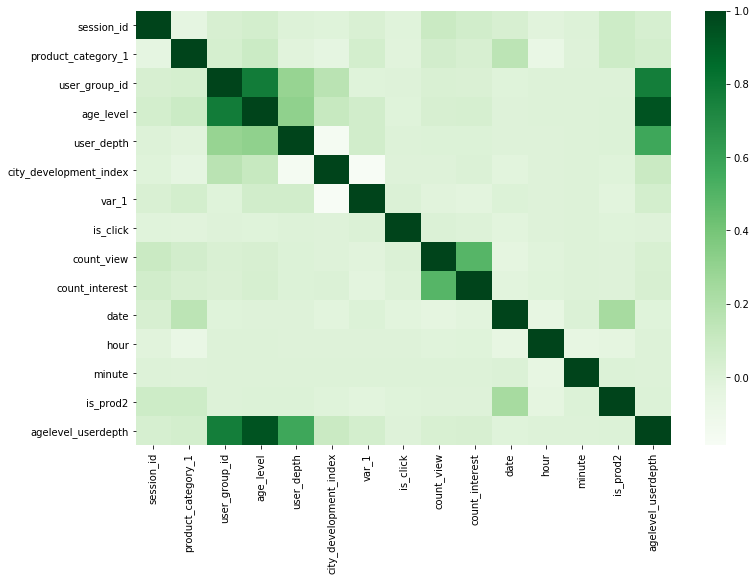

In [272]:
sns.heatmap(df.corr(),cmap='Greens')

Not a single good correlated value!!!

In [146]:
# differentiating categorical and other variables
cat_cols = ['user_id','product','campaign_id','webpage_id','gender']
int_cols = [col for col in train.columns if col not in cat_cols]

In [147]:
df.columns

Index(['session_id', 'user_id', 'product', 'campaign_id', 'webpage_id',
       'product_category_1', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'city_development_index', 'var_1', 'is_click',
       'count_view', 'count_interest', 'date', 'hour', 'minute', 'is_prod2',
       'agelevel_userdepth'],
      dtype='object')

In [148]:
# missing data if any
print('Missing data in train:',df.columns[df.isnull().any(axis=0)])
print('Missing data in test:',dftest.columns[dftest.isnull().any(axis=0)])

Missing data in train: Index([], dtype='object')
Missing data in test: Index([], dtype='object')


# Prediction

### Feature Engineering Tried
**Try 1**
* Converted webpage_id, campaign_id as categorical variables
* One hot encode all the categorical variables so there was no chance of having NaN values

**Try 2**
* Converted user_id also as the categorical value.
* Gnerated few features such as is_prod2 from product_category_2
* Imputed most of the variables

**Try 3**
* Converted most of the variables to categorical for Catboost to get its efficiency
* Imputed the variables
* Made categorical indices for Catboost to learn and it handles it very well

### Models Tried

* #### Random ForestClassifier
    * **Model Score** :- Gave about 54.XX of public LB accuracy but was not enough
    
* #### DecisionTreeClassifier
    * **Model Score** :- Gave about 51.XX accuracy, a simple DC was giving either 0.5 or 1

* #### Logistic Regression
    * **Model Score** :- Not able to go up than 54.XX , tried to tune it but was no avail

* #### XGBClassifier
    * **Model Score** :- Helped me a lot in training, spiked up the score to 58.XX, as did learn from Black Friday hackathon. Using user_id also a s field gave me a boost, tried to label encode it, but was hampering the score.

* #### Catboost
    * **Model Score** :- Best performance given with Try 3 which increased the score to 62.XX, tried playing with the params and got the score.



In [236]:
from catboost import CatBoostClassifier,Pool, cv
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import mode


### Train Test Split

* Tried splitting them and taking out only session_id and is_click variable
* Tried splitting them and taking out session_id, is_click user_depth and is_prod2 variable as it has less feature importances as compared to others

In [ ]:
# X_train,X_val,y_train,y_val = train_test_split(df.drop(['session_id','is_click'],axis=1),df['is_click'],
#                                                  test_size=0.25,random_state = 1994)
#try 2 dropping 'is_prod2''user_depth'
X_train,X_val,y_train,y_val = train_test_split(df.drop(['session_id','is_click','user_depth','is_prod2'],axis=1),df['is_click'],
                                                 test_size=0.25,random_state = 1994)
# X_train,X_val,y_train,y_val = train_test_split(df.drop(['session_id','is_click','user_depth','is_prod2','gender'],axis=1),df['is_click'],
#                                                  test_size=0.25,random_state = 1994)


In [237]:
# categorical indices
categorical_features_indices = np.where(X_train.dtypes =='object')[0]

### Catboost Model Final

In [238]:
cat_model = CatBoostClassifier(n_estimators=1000, # use large n_estimators deliberately to make use of the early stopping
#                          reg_lambda=1.0,
#                          l2_leaf_reg=4.0,
                         eval_metric='AUC',
                         random_seed=1994,
                         learning_rate = 0.05,
                         depth = 8,
                               
#                                boosting_type = 'Ordered',
#                          subsample = 0.8
                         #rsm = 0.7,
                         #silent=True,
                         #max_ctr_complexity = 5,  # no of categorical cols combined
#                          boosting_type = 'Ordered',
#                          od_type = 'IncToDec',  #overfitting params
#                          od_wait = 20)
                         #bagging_temperature = 1.0)
                              )
# lr=0.05, no od type of vars -- highest
    
cat_model.fit(X_train.values,y_train.values,cat_features=categorical_features_indices,eval_set=(X_val, y_val),
        plot=False,early_stopping_rounds=100,use_best_model=True) # early stopping set to 100 to prevent overfitting

0:	test: 0.5846687	best: 0.5846687 (0)	total: 447ms	remaining: 7m 26s
1:	test: 0.5854164	best: 0.5854164 (1)	total: 883ms	remaining: 7m 20s
2:	test: 0.5861178	best: 0.5861178 (2)	total: 1.16s	remaining: 6m 24s
3:	test: 0.5853224	best: 0.5861178 (2)	total: 1.54s	remaining: 6m 24s
4:	test: 0.5844146	best: 0.5861178 (2)	total: 1.96s	remaining: 6m 30s
5:	test: 0.5866180	best: 0.5866180 (5)	total: 2.33s	remaining: 6m 26s
6:	test: 0.5864579	best: 0.5866180 (5)	total: 2.68s	remaining: 6m 19s
7:	test: 0.5871545	best: 0.5871545 (7)	total: 3.02s	remaining: 6m 14s
8:	test: 0.5875622	best: 0.5875622 (8)	total: 3.48s	remaining: 6m 23s
9:	test: 0.5868675	best: 0.5875622 (8)	total: 3.88s	remaining: 6m 24s
10:	test: 0.5869501	best: 0.5875622 (8)	total: 4.27s	remaining: 6m 24s
11:	test: 0.5877651	best: 0.5877651 (11)	total: 4.71s	remaining: 6m 28s
12:	test: 0.5874768	best: 0.5877651 (11)	total: 5.15s	remaining: 6m 31s
13:	test: 0.5874807	best: 0.5877651 (11)	total: 5.57s	remaining: 6m 31s
14:	test: 0.5

115:	test: 0.6314544	best: 0.6314544 (115)	total: 48s	remaining: 6m 5s
116:	test: 0.6315099	best: 0.6315099 (116)	total: 48.5s	remaining: 6m 5s
117:	test: 0.6316390	best: 0.6316390 (117)	total: 49s	remaining: 6m 5s
118:	test: 0.6318739	best: 0.6318739 (118)	total: 49.3s	remaining: 6m 5s
119:	test: 0.6319733	best: 0.6319733 (119)	total: 49.8s	remaining: 6m 5s
120:	test: 0.6319791	best: 0.6319791 (120)	total: 50.2s	remaining: 6m 4s
121:	test: 0.6319985	best: 0.6319985 (121)	total: 50.6s	remaining: 6m 3s
122:	test: 0.6320428	best: 0.6320428 (122)	total: 51s	remaining: 6m 3s
123:	test: 0.6321320	best: 0.6321320 (123)	total: 51.5s	remaining: 6m 3s
124:	test: 0.6321719	best: 0.6321719 (124)	total: 51.9s	remaining: 6m 3s
125:	test: 0.6322023	best: 0.6322023 (125)	total: 52.3s	remaining: 6m 2s
126:	test: 0.6323169	best: 0.6323169 (126)	total: 52.8s	remaining: 6m 2s
127:	test: 0.6323806	best: 0.6323806 (127)	total: 53.1s	remaining: 6m 1s
128:	test: 0.6324997	best: 0.6324997 (128)	total: 53.5s	r

226:	test: 0.6345220	best: 0.6345313 (223)	total: 1m 40s	remaining: 5m 42s
227:	test: 0.6344753	best: 0.6345313 (223)	total: 1m 41s	remaining: 5m 42s
228:	test: 0.6344638	best: 0.6345313 (223)	total: 1m 41s	remaining: 5m 41s
229:	test: 0.6344617	best: 0.6345313 (223)	total: 1m 41s	remaining: 5m 41s
230:	test: 0.6344728	best: 0.6345313 (223)	total: 1m 42s	remaining: 5m 41s
231:	test: 0.6344679	best: 0.6345313 (223)	total: 1m 43s	remaining: 5m 41s
232:	test: 0.6344832	best: 0.6345313 (223)	total: 1m 43s	remaining: 5m 40s
233:	test: 0.6344854	best: 0.6345313 (223)	total: 1m 44s	remaining: 5m 40s
234:	test: 0.6345062	best: 0.6345313 (223)	total: 1m 44s	remaining: 5m 40s
235:	test: 0.6344726	best: 0.6345313 (223)	total: 1m 45s	remaining: 5m 40s
236:	test: 0.6344953	best: 0.6345313 (223)	total: 1m 45s	remaining: 5m 40s
237:	test: 0.6345532	best: 0.6345532 (237)	total: 1m 46s	remaining: 5m 39s
238:	test: 0.6345719	best: 0.6345719 (238)	total: 1m 46s	remaining: 5m 39s
239:	test: 0.6345845	best

336:	test: 0.6347835	best: 0.6349602 (315)	total: 2m 33s	remaining: 5m 1s
337:	test: 0.6347309	best: 0.6349602 (315)	total: 2m 33s	remaining: 5m 1s
338:	test: 0.6347230	best: 0.6349602 (315)	total: 2m 34s	remaining: 5m
339:	test: 0.6347118	best: 0.6349602 (315)	total: 2m 34s	remaining: 5m
340:	test: 0.6347381	best: 0.6349602 (315)	total: 2m 35s	remaining: 5m
341:	test: 0.6347130	best: 0.6349602 (315)	total: 2m 35s	remaining: 4m 59s
342:	test: 0.6347167	best: 0.6349602 (315)	total: 2m 36s	remaining: 4m 59s
343:	test: 0.6346888	best: 0.6349602 (315)	total: 2m 36s	remaining: 4m 58s
344:	test: 0.6346836	best: 0.6349602 (315)	total: 2m 37s	remaining: 4m 58s
345:	test: 0.6347058	best: 0.6349602 (315)	total: 2m 37s	remaining: 4m 58s
346:	test: 0.6347103	best: 0.6349602 (315)	total: 2m 38s	remaining: 4m 57s
347:	test: 0.6347412	best: 0.6349602 (315)	total: 2m 38s	remaining: 4m 57s
348:	test: 0.6347341	best: 0.6349602 (315)	total: 2m 39s	remaining: 4m 57s
349:	test: 0.6347710	best: 0.6349602 (3

#### Feature Importances

In [239]:
# feature importance - duration month is most important variable followed by poi
sorted(zip(cat_model.feature_importances_,X_train),reverse=True)

[(19.926034611403992, 'user_id'),
 (9.755135140614396, 'count_view'),
 (9.03019067461406, 'date'),
 (8.808414260522698, 'webpage_id'),
 (8.523766746737548, 'product'),
 (7.144021224638525, 'minute'),
 (7.139652646729797, 'hour'),
 (6.623665064731843, 'campaign_id'),
 (5.509184757880177, 'product_category_1'),
 (3.4860206749139264, 'city_development_index'),
 (3.254264701296693, 'agelevel_userdepth'),
 (2.9125578829313605, 'user_group_id'),
 (2.910917398933745, 'var_1'),
 (2.790281194788812, 'age_level'),
 (2.1858930192624055, 'count_interest')]

In [240]:
cat_model.best_score_
cat_model.get_params()

{'depth': 8,
 'eval_metric': 'AUC',
 'learning_rate': 0.05,
 'loss_function': 'Logloss',
 'n_estimators': 1000,
 'random_seed': 1994}

#### Predictions on Validation set

In [242]:
preds = cat_model.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val,preds))

0.6349602439611522


### Taking the whole dataset

In [244]:
X,y=df.drop(['session_id','is_click','user_depth','is_prod2'],axis=1),df['is_click']
Xtest=dftest.drop(['session_id','user_depth','is_prod2'],axis=1)

print(X.shape,Xtest.shape)

(463291, 15) (128858, 15)


In [245]:
cat_model.fit(X,y,cat_features=categorical_features_indices,eval_set=(X, y),
        plot=False,early_stopping_rounds=100,use_best_model=True)
y_pred=cat_model.predict_proba(Xtest)[:,1]

0:	test: 0.5885829	best: 0.5885829 (0)	total: 742ms	remaining: 12m 21s
1:	test: 0.5906916	best: 0.5906916 (1)	total: 1.48s	remaining: 12m 17s
2:	test: 0.5938645	best: 0.5938645 (2)	total: 2.05s	remaining: 11m 21s
3:	test: 0.5941771	best: 0.5941771 (3)	total: 2.65s	remaining: 11m 1s
4:	test: 0.5942992	best: 0.5942992 (4)	total: 3.4s	remaining: 11m 17s
5:	test: 0.5959203	best: 0.5959203 (5)	total: 4.11s	remaining: 11m 21s
6:	test: 0.5967858	best: 0.5967858 (6)	total: 4.81s	remaining: 11m 21s
7:	test: 0.5976066	best: 0.5976066 (7)	total: 5.56s	remaining: 11m 28s
8:	test: 0.5991746	best: 0.5991746 (8)	total: 6.33s	remaining: 11m 36s
9:	test: 0.6002171	best: 0.6002171 (9)	total: 6.94s	remaining: 11m 26s
10:	test: 0.6020737	best: 0.6020737 (10)	total: 7.66s	remaining: 11m 28s
11:	test: 0.6024914	best: 0.6024914 (11)	total: 8.43s	remaining: 11m 33s
12:	test: 0.6023937	best: 0.6024914 (11)	total: 9.07s	remaining: 11m 28s
13:	test: 0.6029978	best: 0.6029978 (13)	total: 9.7s	remaining: 11m 23s
1

113:	test: 0.8583492	best: 0.8583492 (113)	total: 1m 20s	remaining: 10m 25s
114:	test: 0.8584387	best: 0.8584387 (114)	total: 1m 21s	remaining: 10m 25s
115:	test: 0.8584629	best: 0.8584629 (115)	total: 1m 22s	remaining: 10m 24s
116:	test: 0.8590576	best: 0.8590576 (116)	total: 1m 22s	remaining: 10m 25s
117:	test: 0.8596070	best: 0.8596070 (117)	total: 1m 23s	remaining: 10m 24s
118:	test: 0.8600132	best: 0.8600132 (118)	total: 1m 24s	remaining: 10m 23s
119:	test: 0.8599427	best: 0.8600132 (118)	total: 1m 24s	remaining: 10m 22s
120:	test: 0.8598606	best: 0.8600132 (118)	total: 1m 25s	remaining: 10m 21s
121:	test: 0.8602385	best: 0.8602385 (121)	total: 1m 26s	remaining: 10m 21s
122:	test: 0.8604256	best: 0.8604256 (122)	total: 1m 27s	remaining: 10m 20s
123:	test: 0.8604879	best: 0.8604879 (123)	total: 1m 27s	remaining: 10m 21s
124:	test: 0.8605805	best: 0.8605805 (124)	total: 1m 28s	remaining: 10m 21s
125:	test: 0.8606343	best: 0.8606343 (125)	total: 1m 29s	remaining: 10m 19s
126:	test: 0

223:	test: 0.8612331	best: 0.8620913 (192)	total: 2m 45s	remaining: 9m 32s
224:	test: 0.8613080	best: 0.8620913 (192)	total: 2m 45s	remaining: 9m 31s
225:	test: 0.8607290	best: 0.8620913 (192)	total: 2m 46s	remaining: 9m 30s
226:	test: 0.8607355	best: 0.8620913 (192)	total: 2m 47s	remaining: 9m 30s
227:	test: 0.8603109	best: 0.8620913 (192)	total: 2m 48s	remaining: 9m 29s
228:	test: 0.8604214	best: 0.8620913 (192)	total: 2m 48s	remaining: 9m 28s
229:	test: 0.8604348	best: 0.8620913 (192)	total: 2m 49s	remaining: 9m 28s
230:	test: 0.8604046	best: 0.8620913 (192)	total: 2m 50s	remaining: 9m 28s
231:	test: 0.8603768	best: 0.8620913 (192)	total: 2m 51s	remaining: 9m 28s
232:	test: 0.8603490	best: 0.8620913 (192)	total: 2m 52s	remaining: 9m 27s
233:	test: 0.8601311	best: 0.8620913 (192)	total: 2m 53s	remaining: 9m 27s
234:	test: 0.8600892	best: 0.8620913 (192)	total: 2m 54s	remaining: 9m 26s
235:	test: 0.8598009	best: 0.8620913 (192)	total: 2m 54s	remaining: 9m 25s
236:	test: 0.8598234	best

In [246]:
y_pred

array([0.08732907, 0.02328576, 0.02194707, ..., 0.0474054 , 0.06777471,
       0.05181794])

In [247]:
s=pd.DataFrame({'session_id':test['session_id'],'is_click':y_pred})
s.head()
# s.to_csv('catboost1.csv',index=False) --main 62 max depth-8 lr-0.1
s.to_csv('catboost10.csv',index=False) #--nope

Gave a score of 62.XXX on public lb

## Using StratifiedKFold - 5 splits 

In [232]:
err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    cat_model5 = CatBoostClassifier(n_estimators=1000,eval_metric='AUC',random_seed=1994,learning_rate = 0.05,depth = 8)
    cat_model5.fit(X_train.values,y_train.values,cat_features=categorical_features_indices,eval_set=(X_test, y_test),
        plot=False,early_stopping_rounds=100,use_best_model=True) # early stopping set to 100 to prevent overfitting
    preds = cat_model5.predict_proba(X_test)[:,1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = cat_model5.predict_proba(Xtest)[:,1]
    y_pred_tot.append(p)

0:	test: 0.5808461	best: 0.5808461 (0)	total: 507ms	remaining: 8m 26s
1:	test: 0.5835546	best: 0.5835546 (1)	total: 810ms	remaining: 6m 43s
2:	test: 0.5860790	best: 0.5860790 (2)	total: 1.35s	remaining: 7m 30s
3:	test: 0.5855220	best: 0.5860790 (2)	total: 1.75s	remaining: 7m 16s
4:	test: 0.5854380	best: 0.5860790 (2)	total: 2.13s	remaining: 7m 3s
5:	test: 0.5853862	best: 0.5860790 (2)	total: 2.6s	remaining: 7m 10s
6:	test: 0.5860316	best: 0.5860790 (2)	total: 3.04s	remaining: 7m 11s
7:	test: 0.5852397	best: 0.5860790 (2)	total: 3.52s	remaining: 7m 16s
8:	test: 0.5853614	best: 0.5860790 (2)	total: 3.98s	remaining: 7m 17s
9:	test: 0.5857671	best: 0.5860790 (2)	total: 4.38s	remaining: 7m 13s
10:	test: 0.5856640	best: 0.5860790 (2)	total: 4.84s	remaining: 7m 15s
11:	test: 0.5858875	best: 0.5860790 (2)	total: 5.23s	remaining: 7m 10s
12:	test: 0.5864877	best: 0.5864877 (12)	total: 5.67s	remaining: 7m 10s
13:	test: 0.5870016	best: 0.5870016 (13)	total: 6.13s	remaining: 7m 11s
14:	test: 0.5867

114:	test: 0.6359293	best: 0.6359293 (114)	total: 52.5s	remaining: 6m 43s
115:	test: 0.6360562	best: 0.6360562 (115)	total: 52.9s	remaining: 6m 43s
116:	test: 0.6360841	best: 0.6360841 (116)	total: 53.3s	remaining: 6m 42s
117:	test: 0.6360291	best: 0.6360841 (116)	total: 53.8s	remaining: 6m 42s
118:	test: 0.6360588	best: 0.6360841 (116)	total: 54.3s	remaining: 6m 41s
119:	test: 0.6361529	best: 0.6361529 (119)	total: 54.8s	remaining: 6m 41s
120:	test: 0.6362225	best: 0.6362225 (120)	total: 55.1s	remaining: 6m 40s
121:	test: 0.6361905	best: 0.6362225 (120)	total: 55.7s	remaining: 6m 40s
122:	test: 0.6362111	best: 0.6362225 (120)	total: 56.2s	remaining: 6m 40s
123:	test: 0.6361962	best: 0.6362225 (120)	total: 56.8s	remaining: 6m 41s
124:	test: 0.6361911	best: 0.6362225 (120)	total: 57.4s	remaining: 6m 41s
125:	test: 0.6362070	best: 0.6362225 (120)	total: 58s	remaining: 6m 42s
126:	test: 0.6362060	best: 0.6362225 (120)	total: 58.5s	remaining: 6m 41s
127:	test: 0.6361753	best: 0.6362225 (12

224:	test: 0.6370319	best: 0.6371872 (220)	total: 1m 50s	remaining: 6m 19s
225:	test: 0.6370104	best: 0.6371872 (220)	total: 1m 50s	remaining: 6m 19s
226:	test: 0.6370166	best: 0.6371872 (220)	total: 1m 51s	remaining: 6m 18s
227:	test: 0.6370095	best: 0.6371872 (220)	total: 1m 51s	remaining: 6m 18s
228:	test: 0.6369749	best: 0.6371872 (220)	total: 1m 52s	remaining: 6m 18s
229:	test: 0.6370254	best: 0.6371872 (220)	total: 1m 52s	remaining: 6m 17s
230:	test: 0.6370318	best: 0.6371872 (220)	total: 1m 53s	remaining: 6m 17s
231:	test: 0.6369837	best: 0.6371872 (220)	total: 1m 53s	remaining: 6m 16s
232:	test: 0.6370065	best: 0.6371872 (220)	total: 1m 54s	remaining: 6m 16s
233:	test: 0.6370234	best: 0.6371872 (220)	total: 1m 55s	remaining: 6m 16s
234:	test: 0.6370030	best: 0.6371872 (220)	total: 1m 55s	remaining: 6m 15s
235:	test: 0.6370237	best: 0.6371872 (220)	total: 1m 55s	remaining: 6m 15s
236:	test: 0.6370700	best: 0.6371872 (220)	total: 1m 56s	remaining: 6m 15s
237:	test: 0.6370593	best

12:	test: 0.5919156	best: 0.5921283 (10)	total: 6.51s	remaining: 8m 14s
13:	test: 0.5915985	best: 0.5921283 (10)	total: 7.07s	remaining: 8m 17s
14:	test: 0.5917690	best: 0.5921283 (10)	total: 7.59s	remaining: 8m 18s
15:	test: 0.5915104	best: 0.5921283 (10)	total: 8.1s	remaining: 8m 18s
16:	test: 0.5913704	best: 0.5921283 (10)	total: 8.62s	remaining: 8m 18s
17:	test: 0.5914344	best: 0.5921283 (10)	total: 9.09s	remaining: 8m 15s
18:	test: 0.5922117	best: 0.5922117 (18)	total: 9.68s	remaining: 8m 19s
19:	test: 0.5921200	best: 0.5922117 (18)	total: 10.2s	remaining: 8m 20s
20:	test: 0.5920528	best: 0.5922117 (18)	total: 10.8s	remaining: 8m 23s
21:	test: 0.5919977	best: 0.5922117 (18)	total: 11.3s	remaining: 8m 22s
22:	test: 0.5921669	best: 0.5922117 (18)	total: 11.8s	remaining: 8m 23s
23:	test: 0.5922783	best: 0.5922783 (23)	total: 12.4s	remaining: 8m 23s
24:	test: 0.5925798	best: 0.5925798 (24)	total: 13s	remaining: 8m 26s
25:	test: 0.5924744	best: 0.5925798 (24)	total: 13.6s	remaining: 8m

126:	test: 0.6346118	best: 0.6346118 (126)	total: 1m 3s	remaining: 7m 15s
127:	test: 0.6346255	best: 0.6346255 (127)	total: 1m 3s	remaining: 7m 14s
128:	test: 0.6346328	best: 0.6346328 (128)	total: 1m 4s	remaining: 7m 14s
129:	test: 0.6345750	best: 0.6346328 (128)	total: 1m 4s	remaining: 7m 13s
130:	test: 0.6345796	best: 0.6346328 (128)	total: 1m 5s	remaining: 7m 13s
131:	test: 0.6346325	best: 0.6346328 (128)	total: 1m 5s	remaining: 7m 13s
132:	test: 0.6346247	best: 0.6346328 (128)	total: 1m 6s	remaining: 7m 13s
133:	test: 0.6346621	best: 0.6346621 (133)	total: 1m 7s	remaining: 7m 13s
134:	test: 0.6347252	best: 0.6347252 (134)	total: 1m 7s	remaining: 7m 13s
135:	test: 0.6347004	best: 0.6347252 (134)	total: 1m 8s	remaining: 7m 12s
136:	test: 0.6347232	best: 0.6347252 (134)	total: 1m 8s	remaining: 7m 12s
137:	test: 0.6347878	best: 0.6347878 (137)	total: 1m 9s	remaining: 7m 11s
138:	test: 0.6347942	best: 0.6347942 (138)	total: 1m 9s	remaining: 7m 11s
139:	test: 0.6347655	best: 0.6347942 (

236:	test: 0.6358980	best: 0.6361233 (199)	total: 2m	remaining: 6m 26s
237:	test: 0.6358824	best: 0.6361233 (199)	total: 2m	remaining: 6m 26s
238:	test: 0.6358496	best: 0.6361233 (199)	total: 2m 1s	remaining: 6m 26s
239:	test: 0.6358702	best: 0.6361233 (199)	total: 2m 1s	remaining: 6m 26s
240:	test: 0.6358671	best: 0.6361233 (199)	total: 2m 2s	remaining: 6m 25s
241:	test: 0.6358728	best: 0.6361233 (199)	total: 2m 3s	remaining: 6m 25s
242:	test: 0.6358320	best: 0.6361233 (199)	total: 2m 3s	remaining: 6m 24s
243:	test: 0.6358370	best: 0.6361233 (199)	total: 2m 4s	remaining: 6m 24s
244:	test: 0.6358281	best: 0.6361233 (199)	total: 2m 4s	remaining: 6m 24s
245:	test: 0.6358361	best: 0.6361233 (199)	total: 2m 5s	remaining: 6m 23s
246:	test: 0.6358676	best: 0.6361233 (199)	total: 2m 5s	remaining: 6m 23s
247:	test: 0.6358399	best: 0.6361233 (199)	total: 2m 6s	remaining: 6m 23s
248:	test: 0.6358686	best: 0.6361233 (199)	total: 2m 6s	remaining: 6m 22s
249:	test: 0.6358515	best: 0.6361233 (199)	t

346:	test: 0.6359145	best: 0.6361698 (300)	total: 2m 59s	remaining: 5m 38s
347:	test: 0.6359015	best: 0.6361698 (300)	total: 3m	remaining: 5m 38s
348:	test: 0.6358892	best: 0.6361698 (300)	total: 3m 1s	remaining: 5m 37s
349:	test: 0.6358976	best: 0.6361698 (300)	total: 3m 1s	remaining: 5m 37s
350:	test: 0.6358999	best: 0.6361698 (300)	total: 3m 2s	remaining: 5m 37s
351:	test: 0.6359095	best: 0.6361698 (300)	total: 3m 2s	remaining: 5m 36s
352:	test: 0.6359189	best: 0.6361698 (300)	total: 3m 3s	remaining: 5m 36s
353:	test: 0.6359228	best: 0.6361698 (300)	total: 3m 3s	remaining: 5m 35s
354:	test: 0.6359077	best: 0.6361698 (300)	total: 3m 4s	remaining: 5m 35s
355:	test: 0.6359481	best: 0.6361698 (300)	total: 3m 5s	remaining: 5m 34s
356:	test: 0.6359743	best: 0.6361698 (300)	total: 3m 5s	remaining: 5m 34s
357:	test: 0.6359016	best: 0.6361698 (300)	total: 3m 6s	remaining: 5m 33s
358:	test: 0.6359380	best: 0.6361698 (300)	total: 3m 6s	remaining: 5m 33s
359:	test: 0.6359277	best: 0.6361698 (30

55:	test: 0.6239611	best: 0.6239611 (55)	total: 29.5s	remaining: 8m 16s
56:	test: 0.6247667	best: 0.6247667 (56)	total: 30s	remaining: 8m 16s
57:	test: 0.6257182	best: 0.6257182 (57)	total: 30.4s	remaining: 8m 13s
58:	test: 0.6263093	best: 0.6263093 (58)	total: 30.9s	remaining: 8m 12s
59:	test: 0.6271547	best: 0.6271547 (59)	total: 31.2s	remaining: 8m 9s
60:	test: 0.6277454	best: 0.6277454 (60)	total: 31.7s	remaining: 8m 7s
61:	test: 0.6283172	best: 0.6283172 (61)	total: 32.2s	remaining: 8m 7s
62:	test: 0.6288247	best: 0.6288247 (62)	total: 32.6s	remaining: 8m 5s
63:	test: 0.6292658	best: 0.6292658 (63)	total: 33.1s	remaining: 8m 3s
64:	test: 0.6295486	best: 0.6295486 (64)	total: 33.5s	remaining: 8m 1s
65:	test: 0.6297678	best: 0.6297678 (65)	total: 34s	remaining: 8m
66:	test: 0.6300754	best: 0.6300754 (66)	total: 34.4s	remaining: 7m 58s
67:	test: 0.6302798	best: 0.6302798 (67)	total: 34.9s	remaining: 7m 58s
68:	test: 0.6305100	best: 0.6305100 (68)	total: 35.3s	remaining: 7m 56s
69:	te

168:	test: 0.6367022	best: 0.6367256 (167)	total: 1m 25s	remaining: 7m 2s
169:	test: 0.6367094	best: 0.6367256 (167)	total: 1m 26s	remaining: 7m 1s
170:	test: 0.6366978	best: 0.6367256 (167)	total: 1m 26s	remaining: 7m 1s
171:	test: 0.6367927	best: 0.6367927 (171)	total: 1m 27s	remaining: 7m 1s
172:	test: 0.6367933	best: 0.6367933 (172)	total: 1m 27s	remaining: 7m
173:	test: 0.6368355	best: 0.6368355 (173)	total: 1m 28s	remaining: 7m
174:	test: 0.6368057	best: 0.6368355 (173)	total: 1m 28s	remaining: 6m 59s
175:	test: 0.6368122	best: 0.6368355 (173)	total: 1m 29s	remaining: 6m 59s
176:	test: 0.6368004	best: 0.6368355 (173)	total: 1m 29s	remaining: 6m 57s
177:	test: 0.6367920	best: 0.6368355 (173)	total: 1m 30s	remaining: 6m 57s
178:	test: 0.6367793	best: 0.6368355 (173)	total: 1m 30s	remaining: 6m 56s
179:	test: 0.6368485	best: 0.6368485 (179)	total: 1m 31s	remaining: 6m 56s
180:	test: 0.6368868	best: 0.6368868 (180)	total: 1m 31s	remaining: 6m 56s
181:	test: 0.6369059	best: 0.6369059 

278:	test: 0.6367700	best: 0.6370003 (202)	total: 2m 24s	remaining: 6m 14s
279:	test: 0.6367362	best: 0.6370003 (202)	total: 2m 25s	remaining: 6m 14s
280:	test: 0.6367099	best: 0.6370003 (202)	total: 2m 26s	remaining: 6m 13s
281:	test: 0.6367268	best: 0.6370003 (202)	total: 2m 26s	remaining: 6m 13s
282:	test: 0.6367598	best: 0.6370003 (202)	total: 2m 27s	remaining: 6m 12s
283:	test: 0.6367525	best: 0.6370003 (202)	total: 2m 27s	remaining: 6m 12s
284:	test: 0.6367581	best: 0.6370003 (202)	total: 2m 28s	remaining: 6m 11s
285:	test: 0.6367447	best: 0.6370003 (202)	total: 2m 28s	remaining: 6m 11s
286:	test: 0.6367358	best: 0.6370003 (202)	total: 2m 29s	remaining: 6m 10s
287:	test: 0.6367175	best: 0.6370003 (202)	total: 2m 29s	remaining: 6m 10s
288:	test: 0.6367253	best: 0.6370003 (202)	total: 2m 30s	remaining: 6m 9s
289:	test: 0.6367079	best: 0.6370003 (202)	total: 2m 30s	remaining: 6m 9s
290:	test: 0.6367053	best: 0.6370003 (202)	total: 2m 31s	remaining: 6m 9s
291:	test: 0.6367185	best: 0

87:	test: 0.6286023	best: 0.6286023 (87)	total: 44s	remaining: 7m 36s
88:	test: 0.6286866	best: 0.6286866 (88)	total: 44.5s	remaining: 7m 35s
89:	test: 0.6287479	best: 0.6287479 (89)	total: 45.1s	remaining: 7m 35s
90:	test: 0.6287734	best: 0.6287734 (90)	total: 45.5s	remaining: 7m 34s
91:	test: 0.6288190	best: 0.6288190 (91)	total: 46s	remaining: 7m 34s
92:	test: 0.6289155	best: 0.6289155 (92)	total: 46.6s	remaining: 7m 34s
93:	test: 0.6289106	best: 0.6289155 (92)	total: 47s	remaining: 7m 32s
94:	test: 0.6289795	best: 0.6289795 (94)	total: 47.4s	remaining: 7m 31s
95:	test: 0.6289552	best: 0.6289795 (94)	total: 47.9s	remaining: 7m 31s
96:	test: 0.6289987	best: 0.6289987 (96)	total: 48.4s	remaining: 7m 30s
97:	test: 0.6290462	best: 0.6290462 (97)	total: 48.9s	remaining: 7m 30s
98:	test: 0.6290996	best: 0.6290996 (98)	total: 49.4s	remaining: 7m 29s
99:	test: 0.6291599	best: 0.6291599 (99)	total: 49.9s	remaining: 7m 29s
100:	test: 0.6290820	best: 0.6291599 (99)	total: 50.4s	remaining: 7m 2

199:	test: 0.6334101	best: 0.6334220 (198)	total: 1m 42s	remaining: 6m 50s
200:	test: 0.6334133	best: 0.6334220 (198)	total: 1m 43s	remaining: 6m 49s
201:	test: 0.6334201	best: 0.6334220 (198)	total: 1m 43s	remaining: 6m 49s
202:	test: 0.6334234	best: 0.6334234 (202)	total: 1m 44s	remaining: 6m 48s
203:	test: 0.6334391	best: 0.6334391 (203)	total: 1m 44s	remaining: 6m 48s
204:	test: 0.6334659	best: 0.6334659 (204)	total: 1m 45s	remaining: 6m 48s
205:	test: 0.6334569	best: 0.6334659 (204)	total: 1m 45s	remaining: 6m 47s
206:	test: 0.6334498	best: 0.6334659 (204)	total: 1m 46s	remaining: 6m 47s
207:	test: 0.6334575	best: 0.6334659 (204)	total: 1m 46s	remaining: 6m 46s
208:	test: 0.6334319	best: 0.6334659 (204)	total: 1m 47s	remaining: 6m 46s
209:	test: 0.6335206	best: 0.6335206 (209)	total: 1m 47s	remaining: 6m 45s
210:	test: 0.6335812	best: 0.6335812 (210)	total: 1m 48s	remaining: 6m 44s
211:	test: 0.6335942	best: 0.6335942 (211)	total: 1m 48s	remaining: 6m 44s
212:	test: 0.6336203	best

309:	test: 0.6345715	best: 0.6345819 (307)	total: 2m 40s	remaining: 5m 57s
310:	test: 0.6345526	best: 0.6345819 (307)	total: 2m 40s	remaining: 5m 56s
311:	test: 0.6345376	best: 0.6345819 (307)	total: 2m 41s	remaining: 5m 56s
312:	test: 0.6345960	best: 0.6345960 (312)	total: 2m 42s	remaining: 5m 55s
313:	test: 0.6346067	best: 0.6346067 (313)	total: 2m 42s	remaining: 5m 55s
314:	test: 0.6345844	best: 0.6346067 (313)	total: 2m 43s	remaining: 5m 54s
315:	test: 0.6345916	best: 0.6346067 (313)	total: 2m 43s	remaining: 5m 54s
316:	test: 0.6345922	best: 0.6346067 (313)	total: 2m 44s	remaining: 5m 53s
317:	test: 0.6345905	best: 0.6346067 (313)	total: 2m 44s	remaining: 5m 53s
318:	test: 0.6346470	best: 0.6346470 (318)	total: 2m 45s	remaining: 5m 52s
319:	test: 0.6346411	best: 0.6346470 (318)	total: 2m 45s	remaining: 5m 52s
320:	test: 0.6346484	best: 0.6346484 (320)	total: 2m 46s	remaining: 5m 52s
321:	test: 0.6346559	best: 0.6346559 (321)	total: 2m 46s	remaining: 5m 51s
322:	test: 0.6347086	best

419:	test: 0.6344576	best: 0.6347086 (322)	total: 3m 40s	remaining: 5m 5s
420:	test: 0.6344495	best: 0.6347086 (322)	total: 3m 41s	remaining: 5m 4s
421:	test: 0.6344644	best: 0.6347086 (322)	total: 3m 42s	remaining: 5m 4s
422:	test: 0.6344877	best: 0.6347086 (322)	total: 3m 42s	remaining: 5m 3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6347086045
bestIteration = 322

Shrink model to first 323 iterations.
err:  0.6347086045117671


In [252]:
err_avg=np.mean(err,0)
err_avg

0.6362664797779944

In [233]:
y_pred=np.mean(y_pred_tot,0)
y_pred

array([0.08967777, 0.02732124, 0.02771389, ..., 0.04598054, 0.06758494,
       0.04569791])

In [234]:
sum(y_pred>0.5)

0

### Final submission file

In [235]:
s=pd.DataFrame({'session_id':test['session_id'],'is_click':y_pred})
s.head()
# s.to_csv('catboost1.csv',index=False) --main 62 max depth-8 lr-0.1
s.to_csv('catboost8_4folds.csv',index=False) #--nope

## Conclusion

As having only one day to score, it was the best that i can give, some conclusions on the way

* Best suited Imputing ways can help predict much better
* its sad to see that the probabilties did'nt even reach 0.5 for any test data
* SMOTE for handling imbalanced data can be used
* New features can be extracted from historical log dataset

# Thanks for having this competition